In [1]:
import matplotlib.pyplot as plt

"""
Small demo to illustrate how the plot function and the gridworld environment work
"""
import numpy as np
import optuna
from gridworld import *
from plot import *

In [2]:
def select_action(eps, decay,episode, state, q_table):
    # do random action
    if np.random.random() < eps/(decay*(episode+1)):
        return np.random.randint(0, len(q_table[0]))
    # or do best action
    else:
        return np.argmax(q_table[state])


In [4]:
def qlearning(env, alpha, gamma, episodes, max_episode_length, init_reward, eps, decay):
    q_table = np.zeros((env.num_states(), env.num_actions()))
    q_table.fill(init_reward)
    learning_data={}
    cum_reward = 0
    # run a certain number of episodes
    for episode in range(episodes):
        state = env.reset()
        action = select_action(eps, decay,episode, state, q_table)

        done = False
        episode_length = 0

        # run episode until a goal state or the maximum number of steps has been reached
        while not done and episode_length < max_episode_length:
            next_state, reward, done = env.step(action)
            next_action = select_action(eps, decay,episode, next_state, q_table)            
            
            # Q-Learning update rule
            delta = reward + gamma * np.max(q_table[next_state, next_action]) * (done < 0.5) - q_table[state, action]
            q_table[state, action] += alpha * delta
            cum_reward += alpha * delta
            
            state = next_state
            action = next_action
            episode_length += 1
            
        learning_data[episode] = [episode_length, cum_reward]

    return learning_data


In [48]:
def run_study():
    study = optuna.create_study(study_name='DRL_Studienarbeit1_A2', storage='sqlite:///DRL_Studienarbeit1_A2.db',load_if_exists=True, direction='maximize')
    study.optimize(qlearning, n_trials=3000)

In [ ]:
run_study()

# Plot 1: Cumulative reward of the current episode over episodes

In [ ]:
#Hyperparameters found via optuna in DRL_Studienarbeit1_A1.db
#Optimized for cumulative reward/episode count
ALPHA = 0.19119333605152306
GAMMA =  0.999748200802963
EPISODES = 200
MAX_EPISODE_LENGTH = 42613
INIT_REWARD = 4
EPS = 0.01972098758840051
DECAY = 0.7262144470920912

data1={}
envs1 = []

for i in range(10):
    env = Random(size=12, water=0.3, mountain=0)
    envs1.append(env)        
    data1[i] = qlearning(env, ALPHA, GAMMA, EPISODES, MAX_EPISODE_LENGTH, INIT_REWARD, EPS, DECAY)

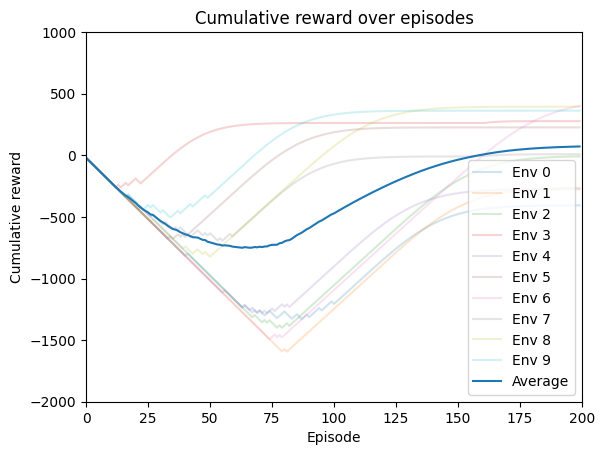

In [47]:
x_data_avg = np.zeros((EPISODES))
y_data_avg = np.zeros((EPISODES))

fig, ax = plt.subplots()
for i in range(data1.keys().__len__()):
    x_data = [value[1] for value in list(data1[i].values())]

    x_data_avg = [sum(x) for x in zip(x_data, x_data_avg)]
    
    ax.plot(range(len(x_data)), x_data, label='Env ' + str(i), alpha = 0.2)

x_data_avg = [a/10 for a in x_data_avg]

ax.plot(range(len(x_data)),x_data_avg, label="Average")

plt.xlabel('Episode')
plt.ylabel('Cumulative reward')
plt.title('Cumulative reward over episodes')
plt.ylim(-2000,1000)
plt.xlim(0,200)

plt.legend()

plt.show()

# Plot 2: Cumulative reward over amount of steps

In [28]:
#Hyperparameters found via optuna in DRL_Studienarbeit1_A2.db
#optimized for cumulative reward/episode length
ALPHA = 0.6660010689218203
GAMMA =  0.9955785729498876
EPISODES = 11620
MAX_EPISODE_LENGTH = 1544
INIT_REWARD = 5
EPS = 0.5579320801207901
DECAY = 0.1763870404498077

data2={}
envs2 = []

for i in range(10):
    env = Random(size=12, water=0, mountain=0.3)
    envs2.append(env)
    data2[i] = qlearning(env, ALPHA, GAMMA, EPISODES, MAX_EPISODE_LENGTH, INIT_REWARD, EPS, DECAY)

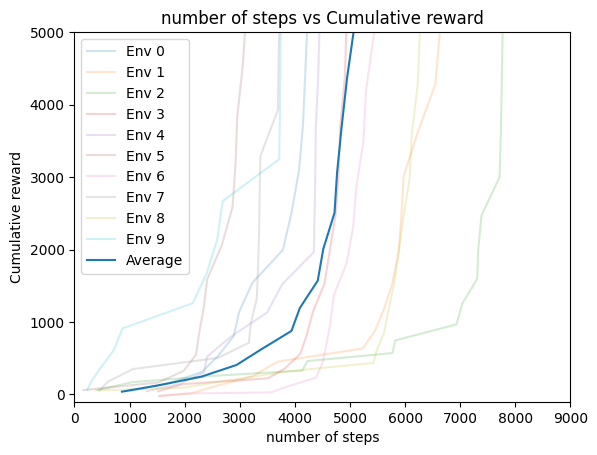

In [33]:
x_data_avg = np.zeros((EPISODES))
y_data_avg = np.zeros((EPISODES))
for i in range(data2.keys().__len__()):
    x_data = np.cumsum([value[0] for value in list(data2[i].values())])
    y_data = np.cumsum([value[1] for value in list(data2[i].values())])
    
    x_data_avg = [sum(x) for x in zip(x_data, x_data_avg)]
    
    y_data_avg = [sum(y) for y in zip(y_data, y_data_avg)]
    
    plt.plot(x_data, y_data, label='Env ' + str(i), alpha=0.2)

x_data_avg = [a/10 for a in x_data_avg]
y_data_avg = [a/10 for a in y_data_avg]

plt.plot(x_data_avg, y_data_avg, label="Average")

# Adding labels and title
plt.xlabel('number of steps')
plt.ylabel('Cumulative reward')
plt.title('number of steps vs Cumulative reward')
plt.ylim(-100,5000)
plt.xlim(0,9000)

plt.legend()

plt.show()